<ipython-input-19-0681e97d21fe>:25: RuntimeWarning: divide by zero encountered in true_divide
  return A / np.asarray(x)
<ipython-input-19-0681e97d21fe>:37: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


[4.34073774]


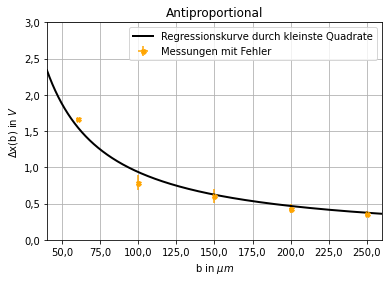

[93.37419044]


In [19]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import ticker as ticker
from scipy.optimize import curve_fit
from sympy import *
from matplotlib import *

file = open("O2d_1_data.csv", encoding="charmap")
beamData = np.loadtxt(file, delimiter=",")

s = beamData[:,0].size
x_dataPos = beamData[:,0]    
y_dataPos = beamData[:,1]

    
xerr = [1 for i in range(0,s)]
yerr = beamData[:,2]

x_dataFit = np.arange(0,300,0.1)

#plt.plot(x_dataPos1,y_dataPos1,'.',label="Spannungsmessungen")           # Einzelne Punkte ohne Fehlerbalken
#plt.plot(x_data7,y_data7,label="pV-Kurve",linewidth=2)                        # Punkte verbunden

def fitCurve(x, A):
    return A / np.asarray(x)

pFit, pCov = curve_fit(fitCurve, x_dataPos, y_dataPos, p0=[4])
plt.plot(x_dataFit, fitCurve(x_dataFit, *pFit), label="Regressionskurve durch kleinste Quadrate", color="Black",linewidth=2)
perr = np.sqrt(np.diag(pCov))
print(perr)

plt.errorbar(x_dataPos,y_dataPos,yerr,xerr,fmt='X',markersize=5,label="Messungen mit Fehler",color="Orange")
plt.ylabel("$\Delta$x(b) in $V$")
plt.xlabel("b in $\mu m$")
plt.title("Antiproportional")
plt.axis([40,260, 0, 3])
ax = plt.subplot(111)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: str(x.round(5)).replace('.',',')))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: str(x.round(1)).replace('.',',')))
plt.legend()
plt.grid(True)
plt.show()

print(pFit)
#x = Symbol('x')
#A = pFit[0].round(4)
#B = pFit[1].round(4)
#fitCurve = A * x + B
#fitCurve

[0.00022652]


<ipython-input-20-bb89ebc0e93c>:42: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


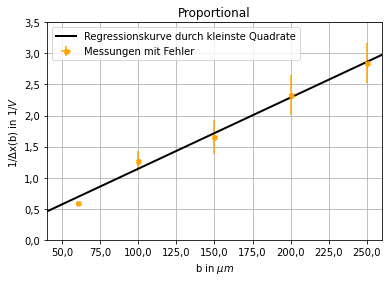

[0.01144992]


In [20]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import ticker as ticker
from scipy.optimize import curve_fit
from sympy import *
from matplotlib import *

file = open("O2d_1_data.csv", encoding="charmap")
beamData = np.loadtxt(file, delimiter=",")

s = beamData[:,0].size
x_dataPos = beamData[:,0]    
y_dataPos = []
for i in range(0,s):
    y_dataPos.append(1/(beamData[i,1]))

    
xerr = [1 for i in range(0,s)]
yerr = []
for i in range(0,s):
    yerr.append(beamData[i,2]/((beamData[i,1])**2))


x_dataFit = np.arange(0,300,0.1)

#plt.plot(x_dataPos1,y_dataPos1,'.',label="Spannungsmessungen")           # Einzelne Punkte ohne Fehlerbalken
#plt.plot(x_data7,y_data7,label="pV-Kurve",linewidth=2)                        # Punkte verbunden

def fitCurve(x, A):
    return A * np.asarray(x)

pFit, pCov = curve_fit(fitCurve, x_dataPos, y_dataPos, p0=[4])
plt.plot(x_dataFit, fitCurve(x_dataFit, *pFit), label="Regressionskurve durch kleinste Quadrate", color="Black",linewidth=2)
perr = np.sqrt(np.diag(pCov))
print(perr)

plt.errorbar(x_dataPos,y_dataPos,yerr,xerr,fmt='X',markersize=5,label="Messungen mit Fehler",color="Orange")
plt.ylabel("$1 / \Delta$x(b) in $1/V$")
plt.xlabel("b in $\mu m$")
plt.title("Proportional")
plt.axis([40,260, 0, 3.5])
ax = plt.subplot(111)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: str(x.round(5)).replace('.',',')))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: str(x.round(1)).replace('.',',')))
plt.legend()
plt.grid(True)
plt.show()

print(pFit)
#x = Symbol('x')
#A = pFit[0].round(4)
#B = pFit[1].round(4)
#fitCurve = A * x + B
#fitCurve

[3.42038063]


<ipython-input-24-06a791762552>:42: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


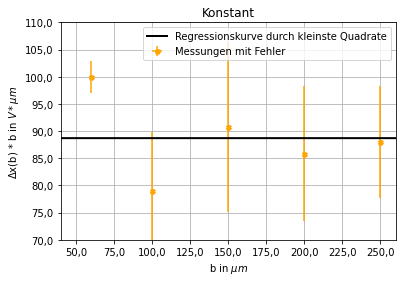

[88.702]


In [24]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import ticker as ticker
from scipy.optimize import curve_fit
from sympy import *
from matplotlib import *

file = open("O2d_1_data.csv", encoding="charmap")
beamData = np.loadtxt(file, delimiter=",")

s = beamData[:,0].size
x_dataPos = beamData[:,0]    
y_dataPos = []
for i in range(0,s):
    y_dataPos.append((beamData[i,0])*(beamData[i,1]))

    
xerr = [1 for i in range(0,s)]
yerr = []
for i in range(0,s):
    yerr.append(((beamData[i,0])*(beamData[i,2]))+((1)*(beamData[i,1])))


x_dataFit = np.arange(0,300,0.1)

#plt.plot(x_dataPos1,y_dataPos1,'.',label="Spannungsmessungen")           # Einzelne Punkte ohne Fehlerbalken
#plt.plot(x_data7,y_data7,label="pV-Kurve",linewidth=2)                        # Punkte verbunden

def fitCurve(x, A):
    return A + np.asarray(x) - np.asarray(x)

pFit, pCov = curve_fit(fitCurve, x_dataPos, y_dataPos, p0=[4])
plt.plot(x_dataFit, fitCurve(x_dataFit, *pFit), label="Regressionskurve durch kleinste Quadrate", color="Black",linewidth=2)
perr = np.sqrt(np.diag(pCov))
print(perr)

plt.errorbar(x_dataPos,y_dataPos,yerr,xerr,fmt='X',markersize=5,label="Messungen mit Fehler",color="Orange")
plt.ylabel("$\Delta$x(b) * b in $V*\mu m$")
plt.xlabel("b in $\mu m$")
plt.title("Konstant")
plt.axis([40,260, 70, 110])
ax = plt.subplot(111)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: str(x.round(5)).replace('.',',')))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: str(x.round(1)).replace('.',',')))
plt.legend()
plt.grid(True)
plt.show()

print(pFit)
#x = Symbol('x')
#A = pFit[0].round(4)
#B = pFit[1].round(4)
#fitCurve = A * x + B
#fitCurve